<a href="https://colab.research.google.com/github/hatimkh20/mnist_handwritten/blob/main/MNIST_Handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep Learning Assignment 01**

Submitted by:
Hatim Khuzema (CS182003) 

# MNIST Handwritten Digit Classification 

MNIST handwritten digit classification build up of 70,000 grayscale images(60k for training, 10k for testing).

Single digit classification from 0 to 9

### Importing Libraries

In [24]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


### Loading Dataset from Keras

Dataset contains 60,000 images for training and 10,000 images for testing.

Size of each image is 28*28 pixel

In [25]:
mnist = tf.keras.datasets.mnist # Object of the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # Load data

In [26]:
train_images.shape

(60000, 28, 28)

In [27]:
test_images.shape

(10000, 28, 28)

In [28]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

###Plotting

Verifying the class labels by visually plotting them.

In [29]:
train_labels[:4]

array([5, 0, 4, 1], dtype=uint8)

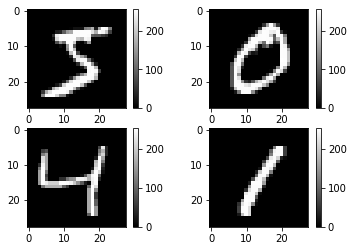

In [30]:
fig = plt.figure()
rows = 2
columns = 2
for i in range(4):
  fig.add_subplot(rows, columns, i + 1)
  plt.imshow(train_images[i], cmap='gray')
  plt.colorbar()
plt.show()

### Data Pre-Processing

Grayscale image are in the range of 0-255 pixels. We will scale them between 0-1. 

In [31]:
train_images = train_images / 255.0

test_images = test_images / 255.0

###Build the Model

Using Sequantial Feed Forward Neural Network by Keras. 

We will have 3 layers.


**First layer** will have input of 784 neurons as image size is 28*28 (784 pixels) so one neuron for one pixel.


**Second layer** is hidden layer having activation function of relu. It has 128 neurons.


**Third layer** is output layer which will contain 10 neurons as we are classifying digits in the range of 0-9.

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [33]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the Model

Training our neural network and setting epochs value to 10 so it will run 10 times to train itself and produce better results.


In [34]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2555 - accuracy: 0.9279
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1106 - accuracy: 0.9669
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0767 - accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0568 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0438 - accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0344 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0283 - accuracy: 0.9910
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0238 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0185 - accuracy: 0.9946
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.015

### Evaluate the Model

Checking the model accuracy by running it on our testing dataset.


In [35]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0763 - accuracy: 0.9777
Test accuracy: 0.9776999950408936


### Predicting the Model

In [36]:
predictions = model.predict(test_images)

We have used **softmax** as an activation function which sums all the values to 1. These can be interpreted as probabilities.

In [37]:
predictions[0]

array([3.6688027e-13, 5.3479464e-11, 2.9677244e-08, 2.4114954e-05,
       2.8240145e-14, 1.5967488e-09, 1.0081334e-16, 9.9997568e-01,
       8.3191853e-09, 2.6217131e-07], dtype=float32)

### Verifying the Predictions

We will verify our model predictions by comparing it with testing dataset. For that, we will predict 4 classes and see the results.

In [38]:
for i in range(4):
  print(np.argmax(predictions[i]))

7
2
1
0


In [39]:
test_labels[:4]

array([7, 2, 1, 0], dtype=uint8)

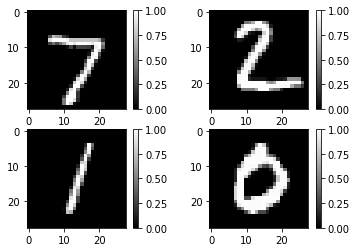

In [40]:
fig = plt.figure()
rows = 2
columns = 2
for i in range(4):
  fig.add_subplot(rows, columns, i + 1)
  plt.imshow(test_images[i], cmap='gray')
  plt.colorbar()
plt.show()